This notebook analyzes the benchmark (BM) ASD terms that were found in the PubMed full-texts and abstracts.

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
from shutil import copyfile

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# configurations that can be modified
INPUT_DIR = "BM_labelled" # folder where the dataframe with labels is stored
FIGURES_DIR = "figures" # diretory where figures will be saved

if not os.path.exists(FIGURES_DIR):
    os.makedirs(FIGURES_DIR)
else:
    print(f"The folder '{FIGURES_DIR}' already exists, so a new folder was not created.")

The folder 'figures' already exists, so a new folder was not created.


In [3]:
# location of full-texts/abstracts in plain text
labels_df_abstract = pd.read_csv(os.path.join(INPUT_DIR, "abstract_labels.csv"))
labels_df_fulltext = pd.read_csv(os.path.join(INPUT_DIR, "full_text_labels.csv"))

In [4]:
# read in BM ASD terms and add TUI
BM_df = pd.read_csv("BM_terms.csv")
BM_df_original = BM_df.copy()
BM_df.rename(columns={"CUI": "CUI_original"}, inplace=True)
BM_df["NEGATED"] = BM_df["CUI_original"].apply(lambda x: str(x)[0] == "-")
BM_df["CUI"] = BM_df["CUI_original"].apply(lambda x: str(x).replace("-", ""))
BM_cui_to_tui_df = pd.read_csv("tui_list_BM.txt", sep="\t", index_col=0, header=None).reset_index()
BM_cui_to_tui_df.columns = ["CUI", "TUI"]
BM_df = BM_df.merge(BM_cui_to_tui_df, how="left")
BM_df["TEXT"] = BM_df["TEXT"].str.strip().str.lower()
semtypes_df = pd.read_csv("SemanticTypes_2018AB.txt", sep="|", header=None)
semtypes_df.columns = ["abbrev", "TUI", "TUI_long"]
BM_df = BM_df.merge(semtypes_df, on="TUI", how="left")
BM_df["TUI_label"] = BM_df.apply(lambda x: f"{x['TUI_long']} ({x['TUI']})", axis=1)
BM_df = BM_df.drop_duplicates()

In [5]:
# terms with more than one CUI
CUI_count_df = BM_df.groupby("TEXT")["CUI"].count().reset_index().rename(columns={"CUI": "CUI_count"})
set(CUI_count_df[CUI_count_df["CUI_count"]!=1]["TEXT"])

{'does not engage or play with other children normally',
 'interested in interacting with family or other children',
 'lining up toys',
 'no functional language',
 'social withdrawal',
 'uninterested in interacting with family or other children'}

In [6]:
# terms with invalid CUIs
BM_df[~((BM_df["CUI"].str.len() == 8) & (BM_df["CUI"].str[0] == 'C'))]

,CUI_original,TEXT,TYPE,NEGATED,CUI,TUI,abbrev,TUI_long,TUI_label
298,CHIP1000201,plays with people as objects,General,False,CHIP1000201,NaN,NaN,NaN,nan (nan)
299,CHIP1000201,uses hand as tool,General,False,CHIP1000201,NaN,NaN,NaN,nan (nan)
300,CHIP1000201,uses examiner's hand as tool,General,False,CHIP1000201,NaN,NaN,NaN,nan (nan)
301,CHIP1000201,uses people as objects,General,False,CHIP1000201,NaN,NaN,NaN,nan (nan)
368,C150868,non-communicating child,General,False,C150868,NaN,NaN,NaN,nan (nan)
369,C150868,he does not talk,General,False,C150868,NaN,NaN,NaN,nan (nan)
370,C150868,no verbal communication,General,False,C150868,NaN,NaN,NaN,nan (nan)
371,C150868,no conversational speech,General,False,C150868,NaN,NaN,NaN,nan (nan)
372,C150868,no intelligible speech,General,False,C150868,NaN,NaN,NaN,nan (nan)
373,C150868,language non-existent,General,False,C150868,NaN,NaN,NaN,nan (nan)


In [7]:
# merge labels with BM term information
labels_df_fulltext = labels_df_fulltext.merge(BM_df, left_on="Entity_lower", right_on="TEXT", how="left")

# clean-up
labels_df_fulltext = labels_df_fulltext.replace({'Entity_lower': {"asperger 's": "asperger's"}})
labels_df_fulltext = labels_df_fulltext.replace({'Entity': {"asperger 's": "asperger's"}})
labels_df_fulltext = labels_df_fulltext.replace({'Entity': {"Asperger 's": "Asperger's"}})

# case-sensitive for ASD and ASDs
labels_df_fulltext = labels_df_fulltext[~((labels_df_fulltext["Entity_lower"]=="asds")&(labels_df_fulltext["Entity"]!="ASDs"))]
labels_df_fulltext = labels_df_fulltext[~((labels_df_fulltext["Entity_lower"]=="asd")&(labels_df_fulltext["Entity"]!="ASD"))]

# drop duplicates (some BM terms have 2 CUIs so just drop one randomly since CUI not being considered in this analaysis)
print(len(labels_df_fulltext))
labels_df_fulltext = labels_df_fulltext.drop_duplicates(["paper", "Start", "End"])
print(len(labels_df_fulltext))

48763
48706


In [8]:
# merge labels with BM term information
labels_df_abstract = labels_df_abstract.merge(BM_df, left_on="Entity_lower", right_on="TEXT", how="left")

# clean-up
labels_df_abstract = labels_df_abstract.replace({'Entity_lower': {"asperger 's": "asperger's"}})
labels_df_abstract = labels_df_abstract.replace({'Entity': {"asperger 's": "asperger's"}})
labels_df_abstract = labels_df_abstract.replace({'Entity': {"Asperger 's": "Asperger's"}})

# case-sensitive for ASD and ASDs
labels_df_abstract = labels_df_abstract[~((labels_df_abstract["Entity_lower"]=="asds")&(labels_df_abstract["Entity"]!="ASDs"))]
labels_df_abstract = labels_df_abstract[~((labels_df_abstract["Entity_lower"]=="asd")&(labels_df_abstract["Entity"]!="ASD"))]

# drop duplicates (some BM terms have 2 CUIs so just drop one randomly since CUI not being considered in this analaysis)
print(len(labels_df_abstract))
labels_df_abstract = labels_df_abstract.drop_duplicates(["paper", "Start", "End"])
print(len(labels_df_abstract))

106375
106284


# statistics for benchmark (BM) set

In [9]:
print("Distinct BM terms (case-sensitive):", len(set(BM_df_original["TEXT"])))
print("Distinct BM terms (case-insensitive):", len(set(BM_df["TEXT"])))

BM_cui_df = BM_df[(BM_df["CUI"].str.len() == 8) & (BM_df["CUI"].str[0] == 'C')] # valid CUI only
print("Distinct CUI in BM terms:", len(set(BM_cui_df["CUI"])))
print("Distinct TUI in BM terms:", len(set(BM_cui_df["TUI"])), sorted(set(BM_cui_df["TUI"])))

Distinct BM terms (case-sensitive): 828
Distinct BM terms (case-insensitive): 827
Distinct CUI in BM terms: 96
Distinct TUI in BM terms: 13 ['T028', 'T033', 'T041', 'T047', 'T048', 'T052', 'T054', 'T055', 'T056', 'T058', 'T080', 'T101', 'T184']


In [10]:
# TUIs ordered by frequency
BM_cui_df.groupby("TUI", as_index=False)["CUI"].count().sort_values(by="CUI", ascending=False)

,TUI,CUI
1,T033,466
4,T048,88
12,T184,85
8,T056,62
6,T054,43
7,T055,21
10,T080,13
2,T041,9
3,T047,5
5,T052,4


# Statistics for full-texts

In [11]:
labels_df = labels_df_fulltext

# check that entitiy and CUI columns are not empty
assert len(labels_df[labels_df["Entity"].str.lower() == "nan"]) == 0
assert len(labels_df[labels_df["Entity_lower"].str.lower() == "nan"]) == 0
assert len(labels_df[labels_df["CUI"].str.len() == 0]) == 0

In [12]:
# statistics for detected benchmark (BM) terms/labels
print("BM terms detected (total):", len(labels_df))

print("Distinct BM terms detected (case-sensitive):", len(set(labels_df["Entity"])))
print("Distinct BM terms detected (case-insensitive):", len(set(labels_df["Entity_lower"])))

cui_df = labels_df[(labels_df["CUI"].str.len() == 8) & (labels_df["CUI"].str[0] == 'C')] # valid CUI only
print("Distinct CUI detected:", len(set(cui_df["CUI"])))
print("Distinct TUI detected:", len(set(cui_df["TUI"])), sorted(set(cui_df["TUI"])))

print("Number of papers with at least one term:", len(set(labels_df["paper"])))
print("Average number of terms per paper:", round(len(labels_df)/len(set(labels_df["paper"])), 2))

BM terms detected (total): 48706
Distinct BM terms detected (case-sensitive): 157
Distinct BM terms detected (case-insensitive): 96
Distinct CUI detected: 48
Distinct TUI detected: 10 ['T033', 'T041', 'T048', 'T052', 'T054', 'T055', 'T056', 'T080', 'T101', 'T184']
Number of papers with at least one term: 544
Average number of terms per paper: 89.53


# Statistics for abstracts

In [13]:
labels_df = labels_df_abstract

# check that entitiy and CUI columns are not empty
assert len(labels_df[labels_df["Entity"].str.lower() == "nan"]) == 0
assert len(labels_df[labels_df["Entity_lower"].str.lower() == "nan"]) == 0
assert len(labels_df[labels_df["CUI"].str.len() == 0]) == 0

In [14]:
# statistics for detected benchmark (BM) terms/labels
print("BM terms detected (total):", len(labels_df))

print("Distinct BM terms detected (case-sensitive):", len(set(labels_df["Entity"])))
print("Distinct BM terms detected (case-insensitive):", len(set(labels_df["Entity_lower"])))

cui_df = labels_df[(labels_df["CUI"].str.len() == 8) & (labels_df["CUI"].str[0] == 'C')] # valid CUI only
print("Distinct CUI detected:", len(set(cui_df["CUI"])))
print("Distinct TUI detected:", len(set(cui_df["TUI"])), sorted(set(cui_df["TUI"])))

print("Number of papers with at least one term:", len(set(labels_df["paper"])))
print("Average number of terms per paper:", round(len(labels_df)/len(set(labels_df["paper"])), 2))

BM terms detected (total): 106284
Distinct BM terms detected (case-sensitive): 159
Distinct BM terms detected (case-insensitive): 106
Distinct CUI detected: 52
Distinct TUI detected: 10 ['T033', 'T041', 'T048', 'T052', 'T054', 'T055', 'T056', 'T080', 'T101', 'T184']
Number of papers with at least one term: 19888
Average number of terms per paper: 5.34


# Pie charts

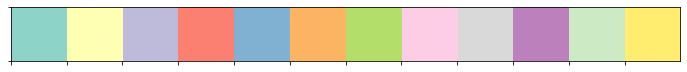

In [15]:
# for pie chart 
colors=sns.color_palette("Set3")
sns.palplot(colors)

In [16]:
# format data for pie chart visualization
def format_for_pie_chart(df, column, cutoff=0.005, other_label="other"):
    
    counts_df = df.groupby([column])["Entity"].count().reset_index().rename(columns={"Entity": "Count"})
    counts_df = counts_df.sort_values(by="Count", ascending=False)
    counts_df["Fraction"] = counts_df["Count"]/sum(counts_df["Count"])
    
    new_df = pd.DataFrame()
    total_low_fraction_count = 0
    for i, row in counts_df.iterrows():
        if row["Fraction"] < cutoff:
            total_low_fraction_count += row["Count"]
        else:
            new_df = new_df.append(row)
    new_df = new_df.append({column: other_label, "Count": total_low_fraction_count}, ignore_index=True)
    labels = new_df[column]
    data = new_df["Count"]
    return data, labels
    

In [17]:
# get frequency of various entities - fulltext
ent_labels_df = labels_df_fulltext.copy(deep=True)
ent_labels_df["Entity_lower"] = ent_labels_df.apply(lambda x: "general" if x["TYPE"]=="General" else x["Entity_lower"], axis=1)
# formatting for pie chart
data_ents_fulltext, labels_ents_fulltext = format_for_pie_chart(ent_labels_df, column="Entity_lower")

# get frequency of various entities - abstract
ent_labels_df = labels_df_abstract.copy(deep=True)
ent_labels_df["Entity_lower"] = ent_labels_df.apply(lambda x: "general" if x["TYPE"]=="General" else x["Entity_lower"], axis=1)
# formatting for pie chart
data_ents_abstract, labels_ents_abstract = format_for_pie_chart(ent_labels_df, column="Entity_lower")

In [18]:
# get frequency of various entities where type = general - fulltext
general_ent_labels_df = labels_df_fulltext[labels_df_fulltext["TYPE"]=="General"]
# formatting for pie chart
data_general_fulltext, labels_general_fulltext = format_for_pie_chart(general_ent_labels_df, column="Entity_lower")

# get frequency of various entities where type = general - abstract
general_ent_labels_df = labels_df_abstract[labels_df_abstract["TYPE"]=="General"]
# formatting for pie chart
data_general_abstract, labels_general_abstract = format_for_pie_chart(general_ent_labels_df, column="Entity_lower")

In [19]:
# get TUI frequency - fulltext
cui_df = labels_df_fulltext[(labels_df_fulltext["CUI"].str.len() == 8) & (labels_df_fulltext["CUI"].str[0] == 'C')] # valid CUI only
# formatting for pie chart
data_tui_fulltext, labels_tui_fulltext = format_for_pie_chart(cui_df, column="TUI", cutoff=0.005, other_label="")

# get TUI frequency - abstract
cui_df = labels_df_abstract[(labels_df_abstract["CUI"].str.len() == 8) & (labels_df_abstract["CUI"].str[0] == 'C')] # valid CUI only
# formatting for pie chart
data_tui_abstract, labels_tui_abstract = format_for_pie_chart(cui_df, column="TUI", cutoff=0.005, other_label="")

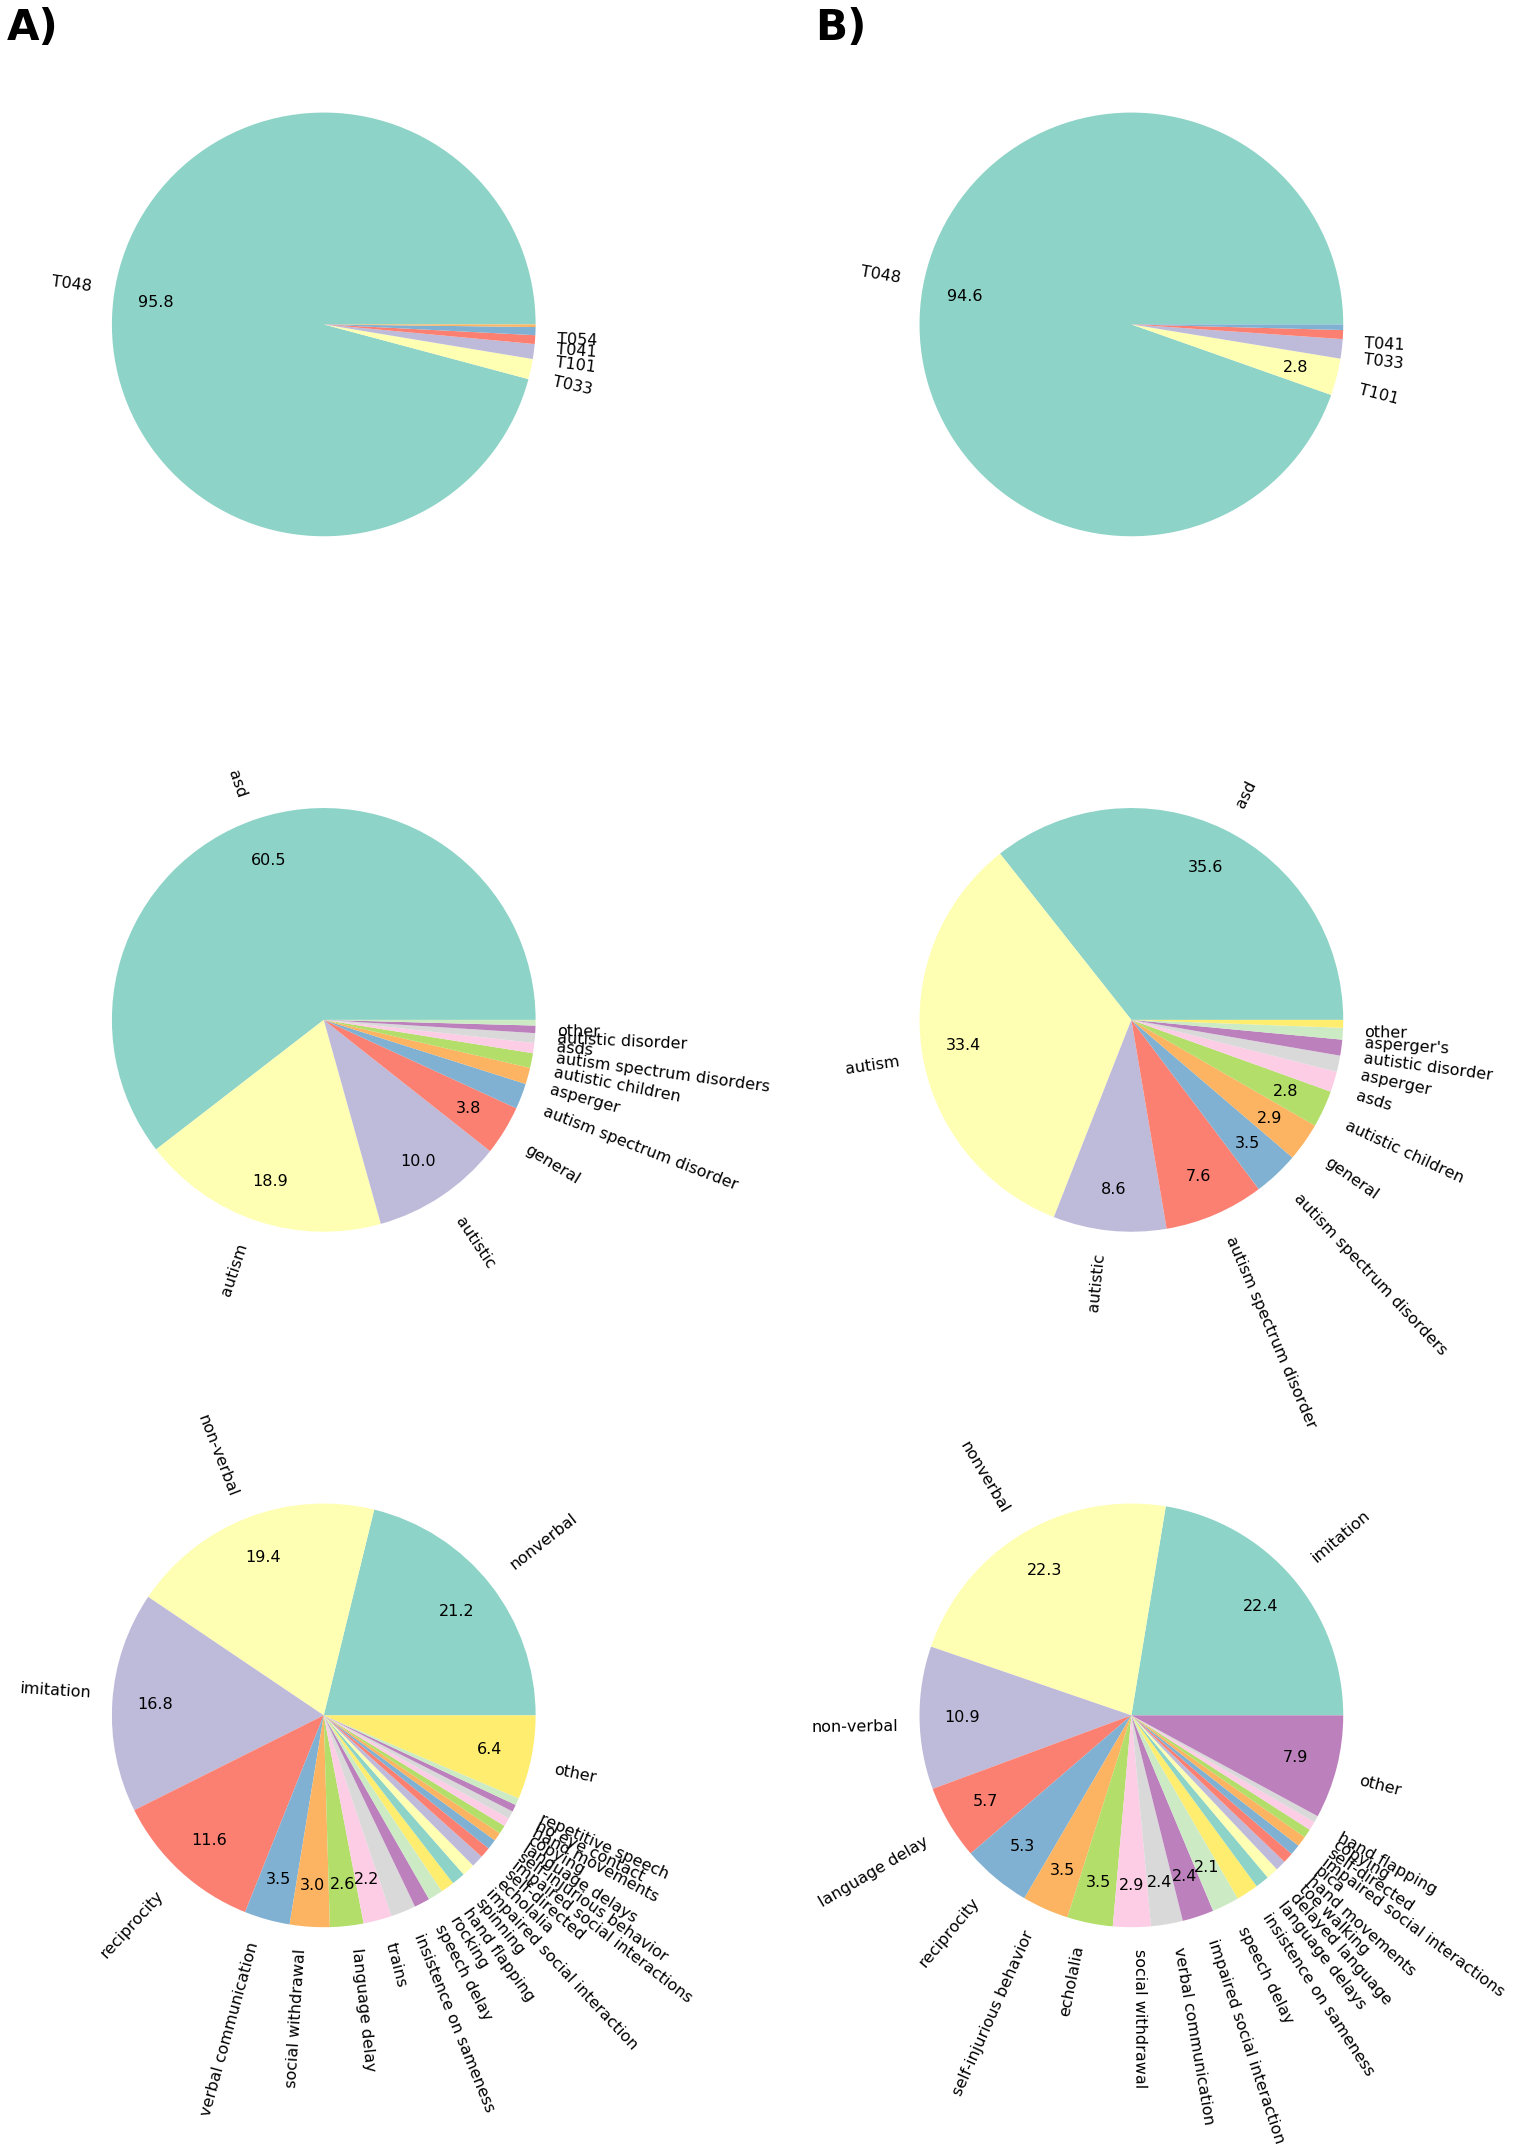

In [20]:
# create pie graph with the data 
fig = plt.figure(figsize=(22, 30)) 
textsize = 16

ax1 = plt.subplot(3, 2, 1)
ax1.pie(data_tui_fulltext, labels=labels_tui_fulltext, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

ax2 = plt.subplot(3, 2, 2)
ax2.pie(data_tui_abstract, labels=labels_tui_abstract, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

plt.subplot(3, 2, 3)
plt.pie(data_ents_fulltext, labels=labels_ents_fulltext, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

plt.subplot(3, 2, 4)
plt.pie(data_ents_abstract, labels=labels_ents_abstract, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

plt.subplot(3, 2, 5)
plt.pie(data_general_fulltext, labels=labels_general_fulltext, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

plt.subplot(3, 2, 6)
plt.pie(data_general_abstract, labels=labels_general_abstract, colors=colors, textprops={'size': textsize}, rotatelabels=True, autopct=lambda pct: "{:.1f}".format(pct) if pct > 2 else "", pctdistance=0.8, labeldistance=1.1)

ax1.text(0, 1.1, "A)", transform=ax1.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')
ax2.text(0, 1.1, "B)", transform=ax2.transAxes, fontsize=42, fontweight='bold', va='top', ha='right')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig(os.path.join(FIGURES_DIR, "figure1_clean"), dpi=300)
